In [11]:
import torch
from utils import *
from core import *

device = 'cuda'

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
A = torch.load('matrix_200/matrix_rot_5.pt')
A.shape

torch.Size([40000, 8000000])

In [14]:
A

tensor(indices=tensor([[      0,       0,       0,  ...,   39998,   39998,
                          39999],
                       [ 242600,  282600,  282601,  ..., 7599803, 7599804,
                        7599803]]),
       values=tensor([0.3875, 0.0000, 0.3855,  ..., 0.0025, 0.0008, 0.3962]),
       size=(40000, 8000000), nnz=9775111, dtype=torch.float16,
       layout=torch.sparse_coo)

In [15]:
projections = torch.load('test_data/projections_scaled.pt')
recons = torch.load('test_data/recon_scaled.pt')
recons.shape, projections.shape

(torch.Size([179, 200, 200]), torch.Size([200, 200, 200]))

In [16]:
recons_filled = torch.zeros(200, 200, 200)
recons_filled.shape

torch.Size([200, 200, 200])

In [17]:
recons_filled[12:191, :, :] = recons

In [18]:
proj = torch.sparse.mm(A.to(torch.float32), recons_filled.flatten().view(-1, 1))
proj.shape

torch.Size([40000, 1])

In [19]:
img = proj.view(200, 200)

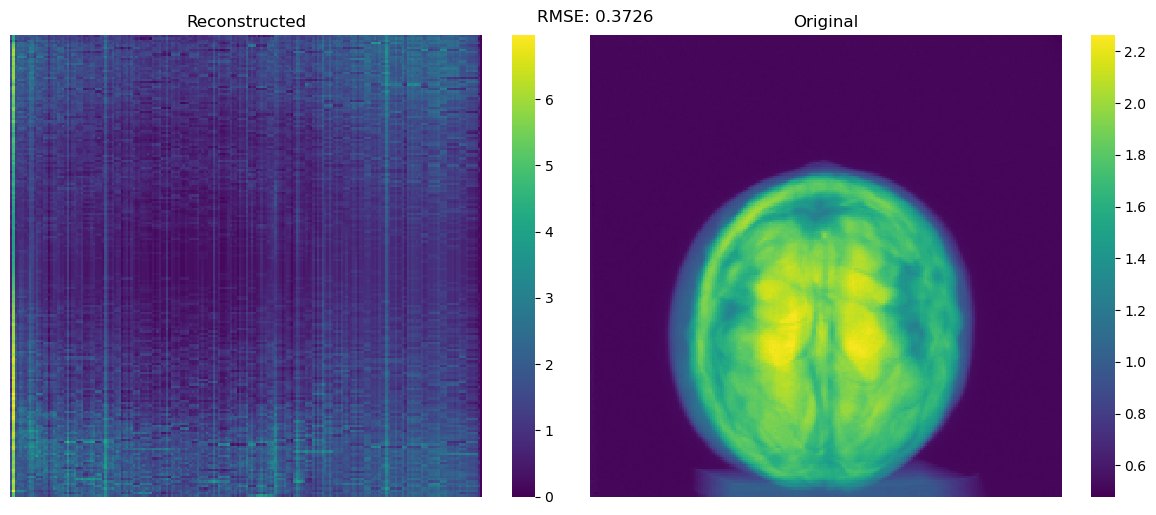

In [20]:
plot_2d_images(img.cpu(), projections[:, :, 5].cpu())